# Data Science and Big Data - Project 2 - Machine Learning

# Assessing credit card applications

### Project Goals

**Provide an overview of the project goals.
What type of learning do you plan to investigate? What is the domain?**

The goal of this project is to develop a predictive model for credit card approval using a dataset that contains information about credit card applicants, such as gender, car ownership, realty ownership, income, education, marital status, etc. Additionally, we aim to integrate another dataset containing information on the month of data extraction, as well as the status of payments (on time, overdue, or written off as bad debt). By merging these datasets, we intend to create a comprehensive model that not only predicts the likelihood of an applicant being 'good' or 'bad' but also considers the payment behavior over time.

This project involves supervised learning, as we have labeled data indicating whether an applicant is 'good' or 'bad.' We will employ classification algorithms to train the model to predict the creditworthiness of future applicants.

The domain of this project is credit risk assessment in the financial sector. By leveraging machine learning techniques, we aim to enhance the accuracy and efficiency of credit card approval processes, ultimately aiding financial institutions in making informed decisions and minimizing the risk of defaults.

**With reference to, P(T, E+ ΔE) > P(T,E), clearly identify the T, P, and E for your domain. It is important to discuss in detail how you plan to assess your work (the P part).**

**Task (T):**
The task (T) in this domain is to predict the creditworthiness of credit card applicants. Specifically, it involves classifying applicants into categories of 'good' or 'bad' based on various features such as gender, car ownership, realty ownership, etc. as mentioned above.

**Experience (E):**
Experience (E) in this context refers to the amount of data and the variety of scenarios the predictive model is exposed to during training. The more diverse and representative the training data, the richer the experience, and consequently, the model's ability to generalize to new, unseen data.

**Performance Metric (P):**
The performance metric (P) is the measurement of how well the predictive model performs the task of creditworthiness prediction. In this project, the performance metric includes accuracy, precision, recall, F1-score, and possibly area under the receiver operating characteristic curve (AUC-ROC). These metrics collectively evaluate the model's ability to correctly classify applicants, distinguish between 'good' and 'bad' credit risks, and minimize false positives and false negatives.

**Assessment of Work (P part):**
1. **Cross-Validation:** Implement cross-validation techniques to assess the model's performance across different subsets of the dataset. This helps ensure that the model generalizes well to unseen data and is not overfitting to specific patterns in the training set.

2. **Confusion Matrix Analysis:** Examine the confusion matrix to understand the distribution of true positives, true negatives, false positives, and false negatives. This analysis provides insights into the model's ability to correctly classify applicants and identify areas for improvement.

3. **ROC Curve and AUC:** Generate the ROC curve and calculate the AUC-ROC score to evaluate the model's ability to trade off between true positive rate and false positive rate. A higher AUC-ROC indicates better overall performance.

4. **Feature Importance Analysis:** Conduct feature importance analysis to understand which features have the most significant impact on the model's predictions. This analysis aids in model interpretability and can inform decision-makers about key factors influencing creditworthiness.

5. **External Validation:** Validate the model on an external dataset not used during training to ensure its robustness and generalizability to new data.

By employing these assessment strategies, we aim to demonstrate that as the model gains more experience through exposure to diverse and representative data (ΔE), its predictive performance (P) in determining creditworthiness improves over time.

### Motivation
Our interest in this project is driven by the increasing importance of credit scoring in financial decisions. According to [Forbes](https://www.forbes.com/advisor/credit-cards/credit-card-statistics/), in the third quarter of 2022, the average credit card debt per borrower was 5,474 USD summing up to a total of $38 billion in new debt in a single quarter. The convergence of technology and finance, especially in credit evaluation, is a rapidly developing area. This project is not only technically stimulating but also carries significant practical implications. By using machine learning to predict whether credit applicants are 'good' or 'bad' risks, this project offers an opportunity to examine how these technologies can improve upon traditional financial models. Additionally, the ethical and regulatory considerations, particularly the importance of transparency in the use of machine learning in financial contexts, add an intriguing dimension.

## Data Overview
The dataset for this project comprises two tables: application_record.csv and credit_record.csv, which can be merged using the client number (ID). We discovered this dataset during online research on credit scoring models and machine learning applications in finance. The application_record.csv file includes personal and financial information of the applicants, such as gender, car ownership, income, education level, and employment details. The credit_record.csv file contains the credit history of the applicants, represented by monthly records of their credit status, including overdue days and payment history. This structure provides a comprehensive view of each applicant's financial behavior and creditworthiness, making it suitable for developing a predictive model for credit scoring.

We found this data set on [Kaggle](https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction/data).

Feedback: Which metric to optimize: precision. because we want to minimize false positives.
Model: Interpretable (why it was not approved).
Let the model tell you the feature importance.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
import itertools
import altair as alt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

# application_df = pd.read_csv('application_record.csv')
# credit_record_df = pd.read_csv('credit_record.csv')

data = pd.read_csv('/content/drive/My Drive/CMU/Courses/Fall’23-1/DSBD/Projects/Project 2/P2-Shared/application_record.csv', encoding = 'latin-1')
record = pd.read_csv('/content/drive/My Drive/CMU/Courses/Fall’23-1/DSBD/Projects/Project 2/P2-Shared/credit_record.csv', encoding = 'latin-1')

# data = pd.read_csv('/content/drive/MyDrive/Big Data Project 2/application_record.csv', encoding = 'latin-1')
# record = pd.read_csv('/content/drive/MyDrive/Big Data Project 2/credit_record.csv', encoding = 'latin-1')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [5]:
data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [6]:
record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [7]:
record.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


# EDA and Data Cleaning

### Deduplication

In [8]:
# Checking for duplicates
print(data.duplicated().value_counts())
print(record.duplicated().value_counts())

False    438557
dtype: int64
False    1048575
dtype: int64


Since there are none, we are proceeding forwards

### Sparse Column Identification

In [9]:
def identify_sparse_columns(df, threshold=0.9):
    sparse_columns = []
    for column in df.columns:
        if ((df[column] == 0).mean() > threshold) or (df[column].isna().mean() > threshold):
            sparse_columns.append(column)
    return sparse_columns

In [10]:
data_sparse_columns = identify_sparse_columns(data)
record_sparse_columns = identify_sparse_columns(record)

print(len(data_sparse_columns), len(record_sparse_columns))

0 0


We see that there are no sparse columns either

### Outlier Handling

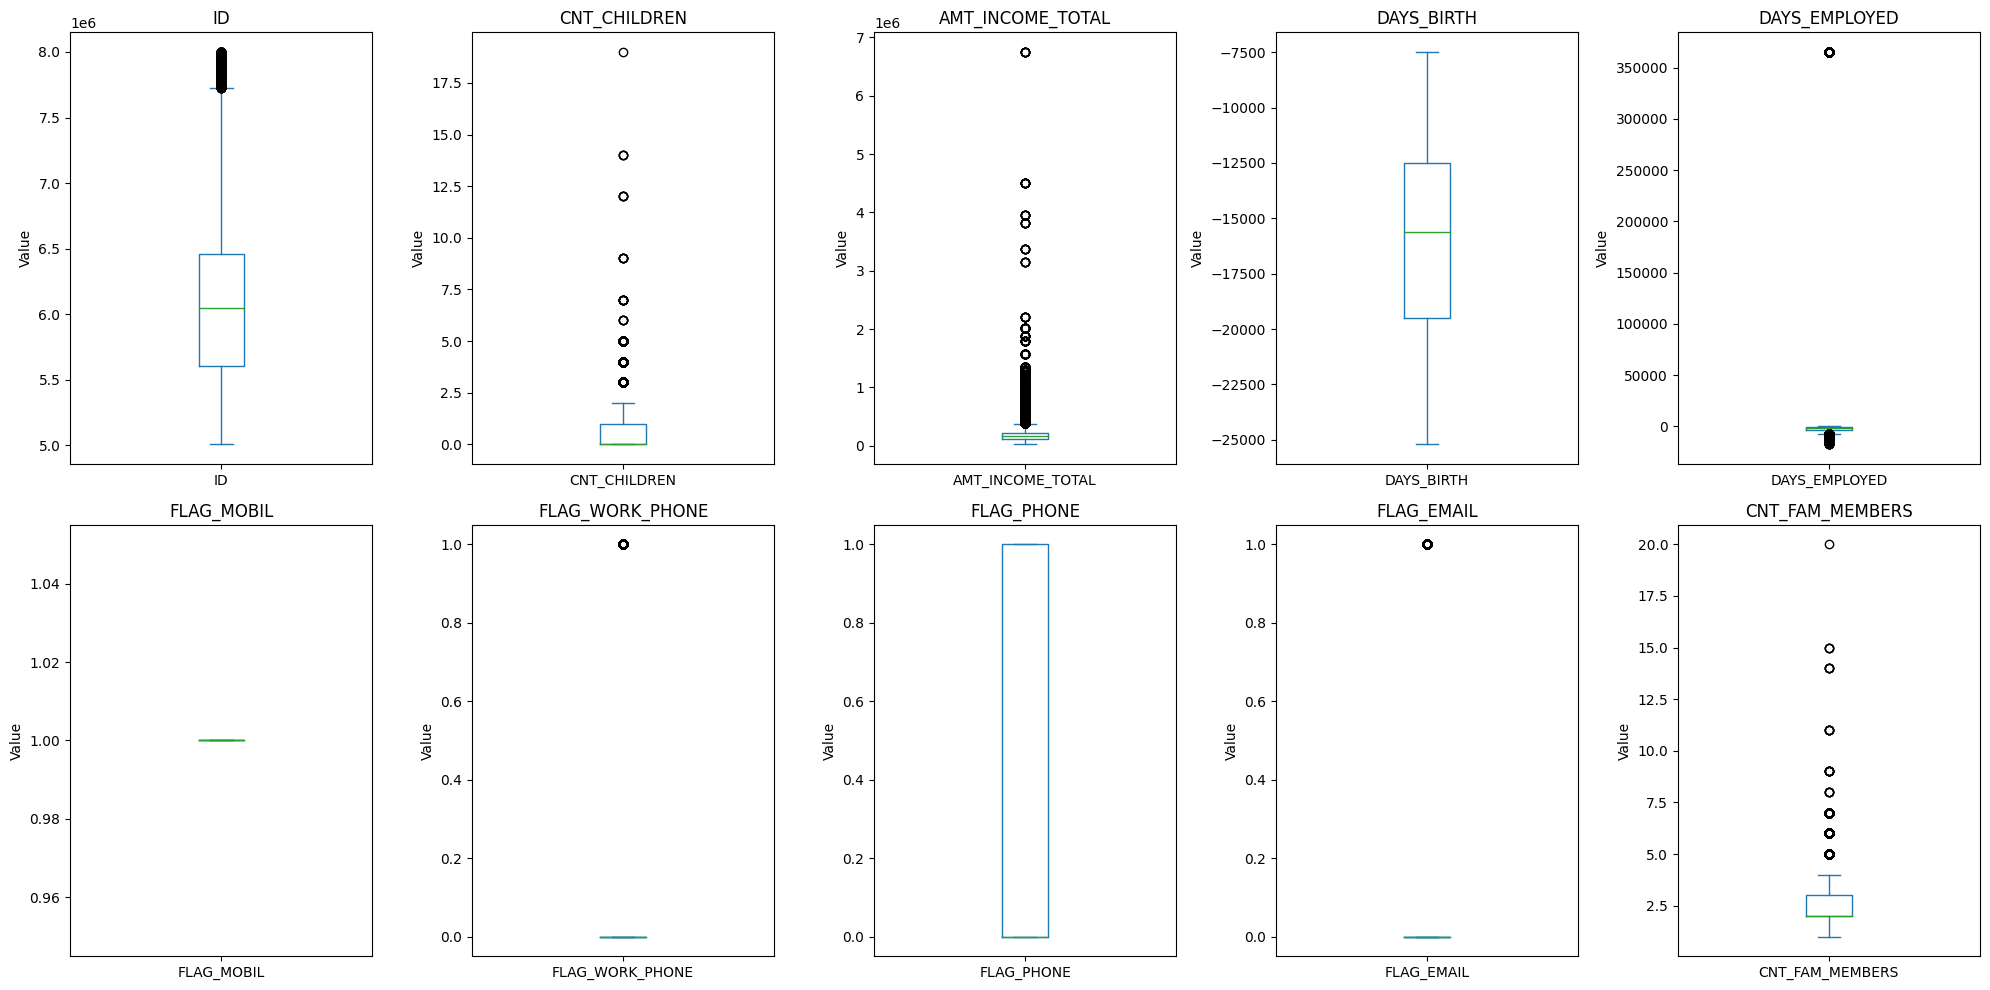

In [11]:
# Check for outliers

# Get all numeric columns
num_cols = data.select_dtypes(include=['int', 'float']).columns

# Create subplot
fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(20, 10))

# Loop through numeric columns to plot boxplots
for i, col in enumerate(num_cols):

  # Get subplot
  ax = axs[i//5, i%5]

  # Generate boxplot
  data[col].plot.box(ax=ax)

  # Add title and axes labels
  ax.set_title(col)
  ax.set_ylabel('Value')

# Adjust subplot spacing
plt.tight_layout()
plt.show()

There seem to be 1 outliers in Amt_income_total and 1 in Days_employed (cannot have 350,000 days employed since that equates ~900 years. So will only be dealing with those.

In [12]:
data[data['AMT_INCOME_TOTAL'] > 6000000]

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
228159,5987963,M,Y,N,0,6750000.0,Working,Higher education,Married,House / apartment,-19341,-443,1,1,1,0,Laborers,2.0
228160,5987964,M,Y,N,0,6750000.0,Working,Higher education,Married,House / apartment,-19341,-443,1,1,1,0,Laborers,2.0
228161,5987966,M,Y,N,0,6750000.0,Working,Higher education,Married,House / apartment,-19341,-443,1,1,1,0,Laborers,2.0
228162,5987967,M,Y,N,0,6750000.0,Working,Higher education,Married,House / apartment,-19341,-443,1,1,1,0,Laborers,2.0
228163,5987968,M,Y,N,0,6750000.0,Working,Higher education,Married,House / apartment,-19341,-443,1,1,1,0,Laborers,2.0
228164,5987969,M,Y,N,0,6750000.0,Working,Higher education,Married,House / apartment,-19341,-443,1,1,1,0,Laborers,2.0
421262,7987964,M,Y,N,0,6750000.0,Working,Higher education,Married,House / apartment,-19341,-443,1,1,1,0,Laborers,2.0


It seems that this data is credible since there are multiple people earning this. The days employed for this is 443 (~1 year) for all those and that seems a little suspect. However, we will leave this as is for now.

In [13]:
len(data[data['DAYS_EMPLOYED'] > 350000])

75329

In [14]:
data[data['DAYS_EMPLOYED'] > 350000]

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
7,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
8,5008813,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
9,5008814,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
76,5008884,F,N,Y,0,315000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,-20186,365243,1,0,0,0,NaN,1.0
160,5008974,F,N,Y,0,112500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-22319,365243,1,0,0,0,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438549,6840098,F,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438550,6840100,F,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438551,6840102,F,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0


In [15]:
data[data['DAYS_EMPLOYED'] > 350000]['DAYS_EMPLOYED'].value_counts()

365243    75329
Name: DAYS_EMPLOYED, dtype: int64

According to the data dictionary, days_employed variable has been encoded  that if positive, it means the person currently unemployed. Now since there are 75000+ rows and all have the same value of 350,000 which equates to ~900 years, we shall assume that that is just a placeholder value for unemployed and hence is not an outlier either. So, I am going to convert those values to 0.

In [16]:
data.loc[data['DAYS_EMPLOYED'] > 350000, 'DAYS_EMPLOYED'] = 0

In [17]:
data[data['DAYS_EMPLOYED'] == 0]['DAYS_EMPLOYED'].value_counts()

0    75329
Name: DAYS_EMPLOYED, dtype: int64

In [18]:
# Now we check for the other dataframe, record


# Count the occurrences of each unique value in 'MONTHS_BALANCE'
month_counts = record['MONTHS_BALANCE'].value_counts().sort_index().reset_index()
month_counts.columns = ['Months', 'Count']

# Create Altair bar chart
bar_chart_months = alt.Chart(month_counts).mark_bar(color='skyblue').encode(
    x='Months:N',
    y='Count:Q',
    tooltip=['Months:N', 'Count:Q']
).properties(
    width=1000,
    height=300,
    title='Bar Chart of MONTHS_BALANCE'
)

bar_chart_months

alt.Chart(...)

No outliers here - range from 0 to -60 and most values are 0 to -10

In [19]:

# Count the occurrences of each unique value in 'STATUS'
status_counts = record['STATUS'].value_counts().sort_index().reset_index()
status_counts.columns = ['Status', 'Count']

# Create Altair bar chart
bar_chart = alt.Chart(status_counts).mark_bar(color='skyblue').encode(
    x='Status:N',
    y='Count:Q',
    tooltip=['Status:N', 'Count:Q']
).properties(
    width=500,
    height=200,
    title='Bar Chart of STATUS'
)

bar_chart

alt.Chart(...)

No outliers here either. Though what this signals is that most data falls in 0, C or X.

### Checking missing Values

In [20]:
data.isna().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

Occupation_type is missing for a lot of people; now out of these, 75329 were unemployed so there occupation_type will not be available anyways. We shall replace them with N/A.

For the rest, we will use MICE to impute the occupation

In [21]:
condition = data['DAYS_EMPLOYED'] > 0
data.loc[condition, 'OCCUPATION_TYPE'] = data.loc[condition, 'OCCUPATION_TYPE'].fillna('N/A')

In [22]:
data['OCCUPATION_TYPE'].value_counts()

Laborers                 78240
Core staff               43007
Sales staff              41098
Managers                 35487
Drivers                  26090
High skill tech staff    17289
Accountants              15985
Medicine staff           13520
Cooking staff             8076
Security staff            7993
Cleaning staff            5845
Private service staff     3456
Low-skill Laborers        2140
Secretaries               2044
Waiters/barmen staff      1665
Realty agents             1041
HR staff                   774
IT staff                   604
Name: OCCUPATION_TYPE, dtype: int64

In [23]:
data.isna().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [24]:
# Lets try filling the rest using MICE. But to avoid data leakage, that will have to be a part of an ML Pipeline. Will be figuring that part out later.

In [25]:
# Now we move to the other dataset
record.isna().sum()

# No nulls here

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

### Creating the outcome variable

Currently, we only have a status variable against each month which takes 0-5, C or X.

We need to group the data to arrive at our outcome variable of interest: whether we have a person whose application will be approved or rejected.

This is what the data dictionary tells us:

* 0: 1-29 days past due
* 1: 30-59 days past due
* 2: 60-89 days overdue
* 3: 90-119 days overdue
* 4: 120-149 days overdue
* 5: Overdue or bad debts, write-offs for more than 150 days
* C: paid off that month
* X: No loan for the month

Therefore, for all the months given for every user, we will try finding instances if the payment
1. has been overdue (i.e., takes the value from 1-5)
2. has been paid or is only slightly overdue (C or 0)
3. does not apply since all months had X, i.e., no loans taken

For the users whose payment has been overdue, we can reject their applications, for ones paid on time, we accept their applications and for those who have not taken any loans, we discard them since they are not applicable to our use case.

In [26]:
status_mapping = {
    '0': 'On Time',
    '1': 'Overdue',
    '2': 'Overdue',
    '3': 'Overdue',
    '4': 'Overdue',
    '5': 'Overdue',
    'C': 'On Time',
    'X': 'Not Applicable'
}

record['Status_Category'] = record['STATUS'].map(status_mapping)


In [27]:
record.head()

,ID,MONTHS_BALANCE,STATUS,Status_Category
0,5001711,0,X,Not Applicable
1,5001711,-1,0,On Time
2,5001711,-2,0,On Time
3,5001711,-3,0,On Time
4,5001712,0,C,On Time


In [28]:
# Group by ID and check conditions for application approval
grouped_data = record.groupby('ID')['Status_Category'].unique()

grouped_data

ID
5001711    [Not Applicable, On Time]
5001712                    [On Time]
5001713             [Not Applicable]
5001714             [Not Applicable]
5001715             [Not Applicable]
                     ...            
5150482                    [On Time]
5150483             [Not Applicable]
5150484                    [On Time]
5150485                    [On Time]
5150487                    [On Time]
Name: Status_Category, Length: 45985, dtype: object

In [29]:
def determine_approval_status(status_categories):
    if 'Overdue' in status_categories:
        return 'Rejected'
    elif 'On Time' in status_categories:
        return 'Approved'
    else:
        return 'Not Applicable'

grouped_data['Approval_Status'] = grouped_data.apply(determine_approval_status)

# Merge the approval status back to the original DataFrame
result_df = pd.merge(record, grouped_data['Approval_Status'], on='ID', how='left')

In [30]:
result_df['Status_Category_y'].value_counts()

Approved          803241
Rejected          143811
Not Applicable    101523
Name: Status_Category_y, dtype: int64

In [31]:
# Checking to see if all IDs have a single status value against them now.
result_df.groupby('ID')['Status_Category_y'].nunique().value_counts()

1    45985
Name: Status_Category_y, dtype: int64

In [32]:
result_df = result_df.groupby('ID')['Status_Category_y'].first().reset_index()

### Merging the outcome variable with earlier dataframe to arrive at the final dataset

In [33]:
new_data = pd.merge(data, result_df[['ID', 'Status_Category_y']], on='ID', how='left')

In [34]:
new_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Status_Category_y
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,Rejected
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,Rejected
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,Approved
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,Approved
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,Not Applicable


In [35]:
new_data.isna().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
Status_Category_y      402100
dtype: int64

Given that 402100 are not existing in our final variable, it means that we dont have data on the status of their applications; hence we can drop them since they are not relevant to our dataset.

In [36]:
new_data.dropna(subset=['Status_Category_y'], inplace = True)

In [37]:
new_data.isna().sum()

ID                         0
CODE_GENDER                0
FLAG_OWN_CAR               0
FLAG_OWN_REALTY            0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
NAME_HOUSING_TYPE          0
DAYS_BIRTH                 0
DAYS_EMPLOYED              0
FLAG_MOBIL                 0
FLAG_WORK_PHONE            0
FLAG_PHONE                 0
FLAG_EMAIL                 0
OCCUPATION_TYPE        11323
CNT_FAM_MEMBERS            0
Status_Category_y          0
dtype: int64

In [38]:
# now we look at the distribution of the outcome variable

# Count the occurrences of each unique value in 'STATUS'
status_counts = new_data['Status_Category_y'].value_counts().sort_index().reset_index()
status_counts.columns = ['Status', 'Count']

# Create Altair bar chart
bar_chart = alt.Chart(status_counts).mark_bar(color='skyblue').encode(
    x='Status:N',
    y='Count:Q',
    tooltip=['Status:N', 'Count:Q']
).properties(
    width=500,
    height=200,
    title='Application Decision'
)

bar_chart

alt.Chart(...)

We see that most of the data belongs to approved category and only a few corresponds to rejected. we are going to discard not applicable data since that is not relevant for us.

In [39]:
new_data = new_data[new_data['Status_Category_y'] != 'Not Applicable']

In [40]:
new_data['Status_Category_y'].value_counts(normalize = True)

Approved    0.870402
Rejected    0.129598
Name: Status_Category_y, dtype: float64

Rename the columns

In [41]:
# Rename columns for better readability
new_data.rename(columns={
    'CODE_GENDER': 'Gender',
    'FLAG_OWN_CAR': 'Car',
    'FLAG_OWN_REALTY': 'Reality',
    'CNT_CHILDREN': 'ChldNo',
    'AMT_INCOME_TOTAL': 'inc',
    'NAME_EDUCATION_TYPE': 'edutp',
    'NAME_FAMILY_STATUS': 'famtp',
    'NAME_HOUSING_TYPE': 'houtp',
    'FLAG_EMAIL': 'email',
    'NAME_INCOME_TYPE': 'inctp',
    'FLAG_WORK_PHONE': 'wkphone',
    'FLAG_PHONE': 'phone',
    'FLAG_MOBIL': 'mobile',
    'CNT_FAM_MEMBERS': 'famsize',
    'DAYS_BIRTH': 'age',
    'OCCUPATION_TYPE': 'occyp',
    'Status_Category_y': 'dep_value'
}, inplace=True)

In [42]:
new_data.head()

,ID,Gender,Car,Reality,ChldNo,inc,inctp,edutp,famtp,houtp,age,DAYS_EMPLOYED,mobile,wkphone,phone,email,occyp,famsize,dep_value
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,Rejected
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,Rejected
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,Approved
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,Approved
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,Approved


#### converting the negative values of days_employed and days_birth to make interpretation easier

In [43]:
new_data[new_data['age'] >= 0]

,ID,Gender,Car,Reality,ChldNo,inc,inctp,edutp,famtp,houtp,age,DAYS_EMPLOYED,mobile,wkphone,phone,email,occyp,famsize,dep_value


Therefore, no positive age exists (unlike DAYS_EMPLOYED)

In [44]:
# so for converting both, I will multiply them by -1 and divide by 365 to get figures in years

In [45]:
new_data['age'] = (-1 * new_data['age']) / 365
new_data['DAYS_EMPLOYED'] = (-1 * new_data['DAYS_EMPLOYED']) / 365

In [46]:
new_data.describe()

,ID,ChldNo,inc,age,DAYS_EMPLOYED,mobile,wkphone,phone,email,famsize
count,3.311000e+04,33110.000000,3.311000e+04,33110.000000,33110.000000,33110.0,33110.000000,33110.000000,33110.000000,33110.000000
mean,5.078015e+06,0.427756,1.858772e+05,43.855514,6.046564,1.0,0.224011,0.292419,0.090396,2.194654
std,4.187679e+04,0.741716,1.014124e+05,11.543528,6.519699,0.0,0.416936,0.454881,0.286752,0.911076
min,5.008804e+06,0.000000,2.700000e+04,21.109589,0.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.041983e+06,0.000000,1.215000e+05,34.139726,1.109589,1.0,0.000000,0.000000,0.000000,2.000000
50%,5.069441e+06,0.000000,1.575000e+05,42.865753,4.252055,1.0,0.000000,0.000000,0.000000,2.000000
75%,5.114633e+06,1.000000,2.250000e+05,53.410959,8.654795,1.0,0.000000,1.000000,0.000000,3.000000
max,5.150487e+06,19.000000,1.575000e+06,68.909589,43.049315,1.0,1.000000,1.000000,1.000000,20.000000


In [47]:
# Since we are predicting whether application is declined or not, we will have approve as 0 and rejected as 1
new_data['dep_value'].replace(['Approved', 'Rejected'], [0, 1], inplace = True)

# Similarly, I am encoding other dummy variables in a similar manner
new_data['Gender'].replace(['F', 'M'], [0, 1], inplace = True)
new_data['Reality'].replace(['N', 'Y'], [0, 1], inplace = True)
new_data['Car'].replace(['N', 'Y'], [0, 1], inplace = True)

## imputing missing values in occupation type (occyp) using MICE

In [48]:
# The labels of missing column need to be encoded
new_data['occyp'].value_counts()

Laborers                 5601
Core staff               3250
Sales staff              3156
Managers                 2695
Drivers                  1934
High skill tech staff    1269
Medicine staff           1124
Accountants              1106
Cooking staff             587
Security staff            547
Cleaning staff            511
Private service staff     293
Waiters/barmen staff      163
Low-skill Laborers        159
Secretaries               142
HR staff                   76
Realty agents              67
IT staff                   57
Name: occyp, dtype: int64

In [49]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
new_data['occyp_encoded'] = label_encoder.fit_transform(new_data['occyp'])

In [50]:
new_data['occyp_encoded'].value_counts()
# It encoded missing values as 18. Need to convert those to nan

18    10373
8      5601
3      3250
14     3156
10     2695
4      1934
6      1269
11     1124
0      1106
2       587
16      547
1       511
12      293
17      163
9       159
15      142
5        76
13       67
7        57
Name: occyp_encoded, dtype: int64

In [51]:
new_data['occyp_encoded'] = new_data['occyp_encoded'].map(lambda x: np.nan if x == 18 else x)

In [52]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(random_state = 10)

In [53]:
# need a training data for the imputer
df_train = new_data.loc[:, ['Gender', 'Car', 'Reality', 'ChldNo', 'inc', 'age', 'DAYS_EMPLOYED', 'mobile', 'wkphone', 'phone', 'email', 'famsize','occyp_encoded']]
imputer.fit(df_train)

IterativeImputer(random_state=10)

In [54]:
df_imputed = imputer.transform(df_train)

In [55]:
df_imputed[:10] # now look at the missing column which is the last column.

array([[1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        4.27500000e+05, 3.28904110e+01, 1.24438356e+01, 1.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.00000000e+00,
        7.34591401e+00],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        4.27500000e+05, 3.28904110e+01, 1.24438356e+01, 1.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.00000000e+00,
        7.34591401e+00],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.12500000e+05, 5.88328767e+01, 3.10684932e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.00000000e+00,
        1.60000000e+01],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        2.70000000e+05, 5.23561644e+01, 8.35890411e+00, 1.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.40000000e+01],
       [0.00000000e+00, 0.00000000e+

In [56]:
new_data.loc[:, ['occyp_encoded']] = df_imputed[:, -1].round()

In [57]:
new_data.head()

,ID,Gender,Car,Reality,ChldNo,inc,inctp,edutp,famtp,houtp,age,DAYS_EMPLOYED,mobile,wkphone,phone,email,occyp,famsize,dep_value,occyp_encoded
0,5008804,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,12.443836,1,1,0,0,NaN,2.0,1,7.0
1,5008805,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,12.443836,1,1,0,0,NaN,2.0,1,7.0
2,5008806,1,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,Security staff,2.0,0,16.0
3,5008808,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,Sales staff,1.0,0,14.0
5,5008810,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,Sales staff,1.0,0,14.0


In [58]:
# now doing an inverse transformation on the occyp_encoded variable
occyp_decoded = list(label_encoder.inverse_transform(new_data['occyp_encoded'].round().astype(int)))
occyp_decoded[:10]

['IT staff',
 'IT staff',
 'Security staff',
 'Sales staff',
 'Sales staff',
 'Sales staff',
 'Laborers',
 'Laborers',
 'Laborers',
 'Accountants']

In [59]:
# Replacing the values in the actual occyp column now, and dropping the encoded column
new_data = new_data.drop('occyp_encoded', axis = 1)
new_data['occyp'] = occyp_decoded
new_data.head()

,ID,Gender,Car,Reality,ChldNo,inc,inctp,edutp,famtp,houtp,age,DAYS_EMPLOYED,mobile,wkphone,phone,email,occyp,famsize,dep_value
0,5008804,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,12.443836,1,1,0,0,IT staff,2.0,1
1,5008805,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,12.443836,1,1,0,0,IT staff,2.0,1
2,5008806,1,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,Security staff,2.0,0
3,5008808,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,Sales staff,1.0,0
5,5008810,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,Sales staff,1.0,0


In [60]:
new_data.isna().sum()

ID               0
Gender           0
Car              0
Reality          0
ChldNo           0
inc              0
inctp            0
edutp            0
famtp            0
houtp            0
age              0
DAYS_EMPLOYED    0
mobile           0
wkphone          0
phone            0
email            0
occyp            0
famsize          0
dep_value        0
dtype: int64

# Transforming the categorical variables

In [61]:
columns_to_encode = ['inctp', 'edutp', 'famtp', 'houtp', 'occyp']

# Perform one-hot encoding
df_encoded = pd.get_dummies(new_data, columns=columns_to_encode)

In [62]:
df_encoded

,ID,Gender,Car,Reality,ChldNo,inc,age,DAYS_EMPLOYED,mobile,wkphone,...,occyp_Laborers,occyp_Low-skill Laborers,occyp_Managers,occyp_Medicine staff,occyp_Private service staff,occyp_Realty agents,occyp_Sales staff,occyp_Secretaries,occyp_Security staff,occyp_Waiters/barmen staff
0,5008804,1,1,1,0,427500.0,32.890411,12.443836,1,1,...,0,0,0,0,0,0,0,0,0,0
1,5008805,1,1,1,0,427500.0,32.890411,12.443836,1,1,...,0,0,0,0,0,0,0,0,0,0
2,5008806,1,1,1,0,112500.0,58.832877,3.106849,1,0,...,0,0,0,0,0,0,0,0,1,0
3,5008808,0,0,1,0,270000.0,52.356164,8.358904,1,0,...,0,0,0,0,0,0,1,0,0,0
5,5008810,0,0,1,0,270000.0,52.356164,8.358904,1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434808,5149828,1,1,1,0,315000.0,47.528767,6.630137,1,0,...,0,0,1,0,0,0,0,0,0,0
434809,5149834,0,0,1,0,157500.0,33.936986,3.630137,1,0,...,0,0,0,1,0,0,0,0,0,0
434810,5149838,0,0,1,0,157500.0,33.936986,3.630137,1,0,...,0,0,0,1,0,0,0,0,0,0
434811,5150049,0,0,1,0,283500.0,49.200000,1.794521,1,0,...,0,0,0,0,0,0,1,0,0,0


# Balancing the data given class imbalance in outcome variable (dep_value)

In [63]:
df_encoded['dep_value'].value_counts()

0    28819
1     4291
Name: dep_value, dtype: int64

In [64]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X = df_encoded.drop('dep_value', axis=1)
y = df_encoded['dep_value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate SMOTE
smote = SMOTE(random_state=1)

# Fit and transform the training data using SMOTE
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Concatenate the resampled data into a new DataFrame
resampled_data = pd.concat([pd.DataFrame(X_train_resampled, columns=X.columns), pd.Series(y_train_resampled, name='dep_value')], axis=1)


In [65]:

# Check the distribution of the target variable in the resampled data
print(resampled_data['dep_value'].value_counts())

# Now, you can use resampled_data for training your model

0    23015
1    23015
Name: dep_value, dtype: int64


In [66]:
resampled_data

,ID,Gender,Car,Reality,ChldNo,inc,age,DAYS_EMPLOYED,mobile,wkphone,...,occyp_Low-skill Laborers,occyp_Managers,occyp_Medicine staff,occyp_Private service staff,occyp_Realty agents,occyp_Sales staff,occyp_Secretaries,occyp_Security staff,occyp_Waiters/barmen staff,dep_value
0,5126574,1,0,0,0,270000.0,46.142466,25.723288,1,0,...,0,0,0,0,0,0,0,0,0,0
1,5053768,0,0,1,0,360000.0,40.238356,6.747945,1,1,...,0,0,0,0,0,0,0,0,0,1
2,5091578,0,0,0,2,225000.0,33.545205,6.468493,1,0,...,0,0,0,0,0,1,0,0,0,1
3,5025104,1,1,1,2,270000.0,43.654795,10.093151,1,1,...,0,1,0,0,0,0,0,0,0,0
4,5036862,0,1,1,0,139500.0,39.964384,19.446575,1,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46025,5089978,1,0,0,0,225000.0,37.156740,11.228040,1,0,...,0,0,0,0,0,0,0,0,0,1
46026,5062291,0,0,1,0,216000.0,38.274654,5.945775,1,0,...,0,0,0,0,0,0,0,0,0,1
46027,5023459,0,0,0,1,225000.0,35.446178,5.449673,1,0,...,0,0,0,0,0,0,0,0,0,1
46028,5125641,1,0,0,2,171000.0,37.641332,12.602699,1,0,...,0,0,0,0,0,0,0,0,0,1


# ML Pipeline

In [74]:
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import FunctionTransformer

In [75]:
num = MinMaxScaler()
ohe = OneHotEncoder()

In [76]:
ct = make_column_transformer(
      #  (ohe, ['inctp', 'edutp', 'famtp', 'houtp', 'occyp']),
      #  (imp, ['occyp']),
       (num, ['ChldNo', 'inc', 'age', 'DAYS_EMPLOYED', 'famsize']),
       remainder = 'passthrough'
)

In [78]:
# Load general utilities
# ----------------------
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import datetime
import numpy as np
import pickle
import time
import seaborn as sns

# Load sklearn utilities
# ----------------------
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, brier_score_loss, mean_squared_error, r2_score

from sklearn.calibration import calibration_curve

# Load classifiers
# ----------------
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier

# Other Packages
# --------------
from scipy.stats import kendalltau
from sklearn.neural_network import MLPRegressor
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
# from sklearn.externals.six import StringIO
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
# from scipy.interpolate import spline

# Load debugger, if required
#import pixiedust
pd.options.mode.chained_assignment = None #'warn'

# suppress all warnings
import warnings
warnings.filterwarnings("ignore")

In [79]:
default_seed = 1
# output_file = "output_sample"

def fit_classification(pipeline, data_dict,
                          cv_parameters = {},
                          model_name = None,
                          random_state = default_seed,
                          output_to_file = True,
                          print_to_screen = True,
                          print_feature_importance = False):
    '''
    This function will fit a classification model to data and print various evaluation
    measures. It expects the following parameters
      - model: an sklearn model object
      - data_dict: the dictionary containing both training and testing data;
                   returned by the prepare_data function
      - cv_parameters: a dictionary of parameters that should be optimized
                       over using cross-validation. Specifically, each named
                       entry in the dictionary should correspond to a parameter,
                       and each element should be a list containing the values
                       to optimize over
      - model_name: the name of the model being fit, for printouts
      - random_state: the random seed to use
      - print_to_screen: if the results will be printed on screen

    If the model provided does not have a predict_proba function, we will
    simply print accuracy diagnostics and return.

    If the model provided does have a predict_proba function, we first
    figure out the optimal threshold that maximizes the accuracy and
    print out accuracy diagnostics. We then print an ROC curve, sensitivity/
    specificity curve, and calibration curve.

    This function returns a dictionary with the following entries
      - model: the best fitted model
      - y_pred: predictions for the test set
      - y_pred_probs: probability predictions for the test set, if the model
                      supports them
      - y_pred_score: prediction scores for the test set, if the model does not
                      output probabilities.
    '''

    np.random.seed(random_state)

    # --------------------------
    #   Step 1 - Load the data
    # --------------------------

    X = resampled_data.drop(['dep_value','ID'], axis=1)
    y = resampled_data['dep_value']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)


    # --------------------------
    #   Step 2 - Fit the model
    # --------------------------

    cv_model = GridSearchCV(pipeline.steps[1][1], cv_parameters)

    start_time = time.time()
    cv_model.fit(X_train, y_train)
    end_time = time.time()

    best_model = cv_model.best_estimator_

    if print_to_screen:

        if model_name != None:
            print("=========================================================")
            print("  Model: " + model_name)
            print("=========================================================")

        print("Fit time: " + str(round(end_time - start_time, 2)) + " seconds")
        print("Optimal parameters:")
        print(cv_model.best_params_)
        print("")

    if print_feature_importance:
        feature_importance = best_model.feature_importances_
        print("Feature Importance:")
        for feature, importance in zip(X.columns, feature_importance):
            print(f"{feature}: {importance}")
    # -------------------------------
    #   Step 3 - Evaluate the model
    # -------------------------------

    # If possible, make probability predictions
    try:
        y_pred_probs = best_model.predict_proba(X_test)[:,1]
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

        probs_predicted = True
    except:
        probs_predicted = False

    # Make predictions; if we were able to find probabilities, use
    # the threshold that maximizes the accuracy in the training set.
    # If not, just use the learner's predict function
    if probs_predicted:
        y_train_pred_probs = best_model.predict_proba(X_train)[:,1]
        fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_pred_probs)

        true_pos_train = tpr_train*(y_train.sum())
        true_neg_train = (1 - fpr_train) *(1-y_train).sum()

        best_threshold_index = np.argmax(true_pos_train + true_neg_train)
        best_threshold = 1 if best_threshold_index == 0 else thresholds_train[ best_threshold_index ]

        if print_to_screen:
            print("Accuracy-maximizing threshold was: " + str(best_threshold))

        y_pred = (y_pred_probs > best_threshold)
    else:
        y_pred = best_model.predict(X_test)

    if print_to_screen:
        print("Accuracy: ", accuracy_score(y_test, y_pred))
        print(classification_report(y_test, y_pred, target_names =['No default', 'Default'], digits = 4))

    if print_to_screen:
        if probs_predicted:
            plt.figure(figsize = (13, 4.5))
            plt.subplot(2, 2, 1)

            plt.title("ROC Curve (AUC = %0.2f)"% roc_auc_score(y_test, y_pred_probs))
            plt.plot(fpr, tpr, 'b')
            plt.plot([0,1],[0,1],'r--')
            plt.xlim([0,1]); plt.ylim([0,1])
            plt.ylabel('True Positive Rate')
            plt.xlabel('False Positive Rate')

            plt.subplot(2, 2, 3)

            plt.plot(thresholds, tpr, 'b', label = 'Sensitivity')
            plt.plot(thresholds, 1 -fpr, 'r', label = 'Specificity')
            plt.legend(loc = 'lower right')
            plt.xlim([0,1]); plt.ylim([0,1])
            plt.xlabel('Threshold')

            plt.subplot(2, 2, 2)

            fp_0, mpv_0 = calibration_curve(y_test, y_pred_probs, n_bins = 10)
            plt.plot([0,1], [0,1], 'k:', label='Perfectly calibrated')
            plt.plot(mpv_0, fp_0, 's-')
            plt.ylabel('Fraction of Positives')
            plt.xlim([0,1]); plt.ylim([0,1])
            plt.legend(loc ='upper left')

            plt.subplot(2, 2, 4)
            plt.hist(y_pred_probs, range=(0, 1), bins=10, histtype="step", lw=2)
            plt.xlim([0,1]); plt.ylim([0,20000])
            plt.xlabel('Mean Predicted Probability')
            plt.ylabel('Count')

            #plt.tight_layout()
            plt.show()


    # Return the model predictions, and the
    # test set
    # -------------------------------------
    out = {'model':best_model, 'y_pred_labels':y_pred}

    if probs_predicted:
        out.update({'y_pred_probs':y_pred_probs})
    else:
        y_pred_score = best_model.decision_function(X_test)
        out.update({'y_pred_score':y_pred_score})


    return out

## Baseline Model: Gaussian Naive Bayes Classifier

  Model: Naive Bayes Classifier
Fit time: 0.23 seconds
Optimal parameters:
{}

Accuracy-maximizing threshold was: 0.5326244147226916
Accuracy:  0.5896154681729306
              precision    recall  f1-score   support

  No default     0.5716    0.7106    0.6336      4596
     Default     0.6191    0.4690    0.5337      4610

    accuracy                         0.5896      9206
   macro avg     0.5954    0.5898    0.5836      9206
weighted avg     0.5954    0.5896    0.5836      9206



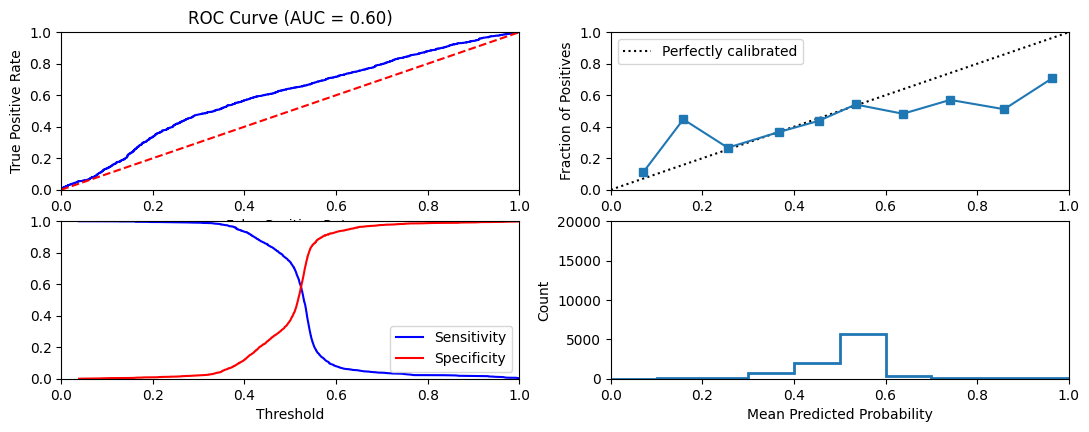

In [80]:
gnb = GaussianNB()
p1 = make_pipeline(ct, gnb)
gnb = fit_classification(p1, resampled_data, model_name = 'Naive Bayes Classifier')

The precision scores (62%) are not very good. Slightly better than random guessing. The AUC is 0.6.

## Multinomial Naive Bayes

  Model: MNB
Fit time: 0.22 seconds
Optimal parameters:
{}

Accuracy-maximizing threshold was: 0.22423300896190174
Accuracy:  0.6263306539213557
              precision    recall  f1-score   support

  No default     0.6534    0.5357    0.5887      4596
     Default     0.6076    0.7167    0.6576      4610

    accuracy                         0.6263      9206
   macro avg     0.6305    0.6262    0.6232      9206
weighted avg     0.6305    0.6263    0.6232      9206



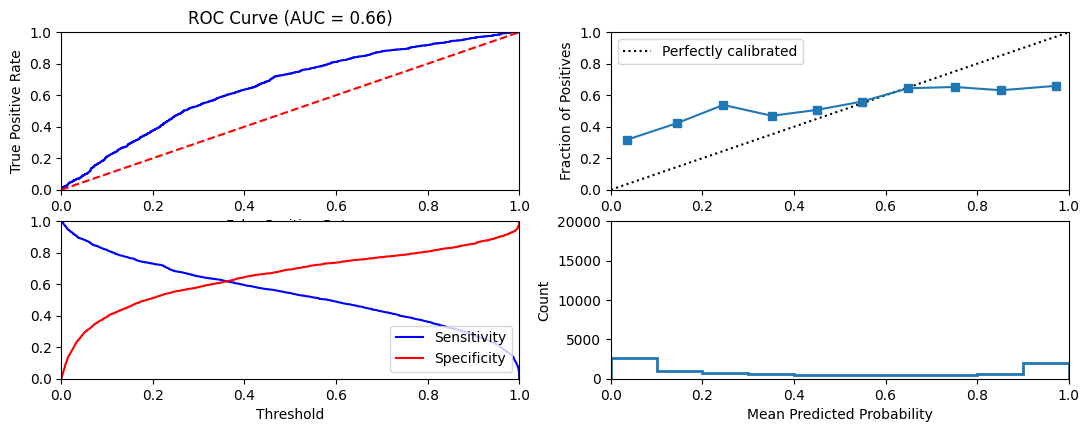

{'model': MultinomialNB(),
 'y_pred_labels': array([False,  True, False, ...,  True,  True,  True]),
 'y_pred_probs': array([0.00180979, 0.76842162, 0.02140034, ..., 0.99873443, 0.47742651,
        0.97092613])}

In [81]:
mNB = MultinomialNB()
p1 = make_pipeline(ct, mNB)
fit_classification(p1, resampled_data, model_name = 'MNB')

The precision is worse than our baseline model at 60% but the AUC is higher slightly (0.66)

## Multilayer Perceptron Classifier

  Model: Multi-Layer perceptron
Fit time: 159.99 seconds
Optimal parameters:
{'activation': 'relu', 'max_iter': 100}

Accuracy-maximizing threshold was: 1.6574256410611019e-31
Accuracy:  0.6055833152291984
              precision    recall  f1-score   support

  No default     0.5702    0.8527    0.6834      4596
     Default     0.7098    0.3592    0.4770      4610

    accuracy                         0.6056      9206
   macro avg     0.6400    0.6060    0.5802      9206
weighted avg     0.6401    0.6056    0.5801      9206



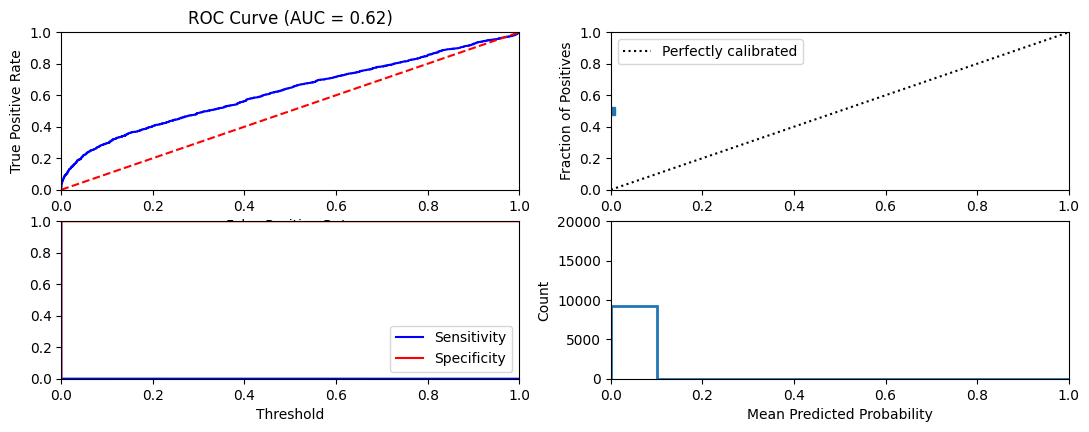

In [82]:
mlp = MLPClassifier()
cv_parameters = {
    'activation': ['logistic', 'relu'],
    'max_iter': [100, 200]
}
p1 = make_pipeline(ct, mlp)

mlPerceptron = fit_classification(p1, resampled_data,cv_parameters, model_name = 'Multi-Layer perceptron')

Precision improved! We are at 71% though the AUC is slightly lower. Need look for better models.

## Decision Tree

  Model: Decision Tree
Fit time: 16.58 seconds
Optimal parameters:
{'criterion': 'gini', 'max_depth': 10}

Accuracy-maximizing threshold was: 0.5267857142857143
Accuracy:  0.8134912013903975
              precision    recall  f1-score   support

  No default     0.7803    0.8718    0.8236      4596
     Default     0.8553    0.7553    0.8022      4610

    accuracy                         0.8135      9206
   macro avg     0.8178    0.8136    0.8129      9206
weighted avg     0.8179    0.8135    0.8129      9206



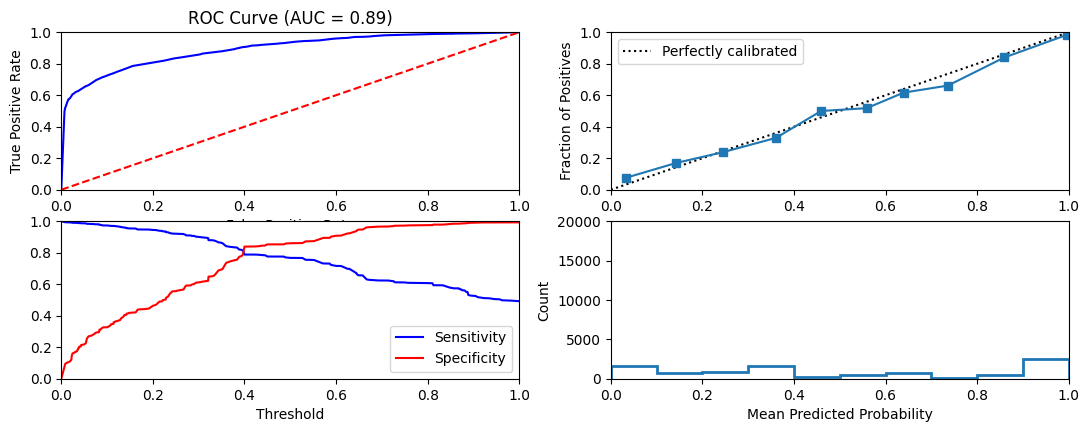

In [87]:
decision_tree = DecisionTreeClassifier()
cv_parameters = {
    'max_depth':np.arange(1, 11),
    'criterion': ['gini', 'entropy']
}
p1 = make_pipeline(ct, decision_tree)

rf = fit_classification(p1, resampled_data,cv_parameters, model_name = 'Decision Tree')

## Random Forest



  Model: Random Forest
Fit time: 221.59 seconds
Optimal parameters:
{'max_depth': 100, 'min_samples_leaf': 3, 'n_estimators': 100}

Feature Importance:
Gender: 0.017104933162447204
Car: 0.029455007428890522
Reality: 0.0340654455976783
ChldNo: 0.02399670142696818
inc: 0.08030447953301233
age: 0.10352558852357242
DAYS_EMPLOYED: 0.09760249685785746
mobile: 0.0
wkphone: 0.022065689436042014
phone: 0.025238115727104916
email: 0.00883489257693405
famsize: 0.07842752433380283
inctp_Commercial associate: 0.04813757461730405
inctp_Pensioner: 0.015335205830040988
inctp_State servant: 0.026307573628944324
inctp_Student: 5.671625445864655e-05
inctp_Working: 0.051657822536914824
edutp_Academic degree: 0.000431450255938633
edutp_Higher education: 0.03579086012527529
edutp_Incomplete higher: 0.009066846202348672
edutp_Lower secondary: 0.0030878462737277306
edutp_Secondary / secondary special: 0.0350859621865281
famtp_Civil marriage: 0.01939362043269498
famtp_Married: 0.02841401112940392
famtp_Separat

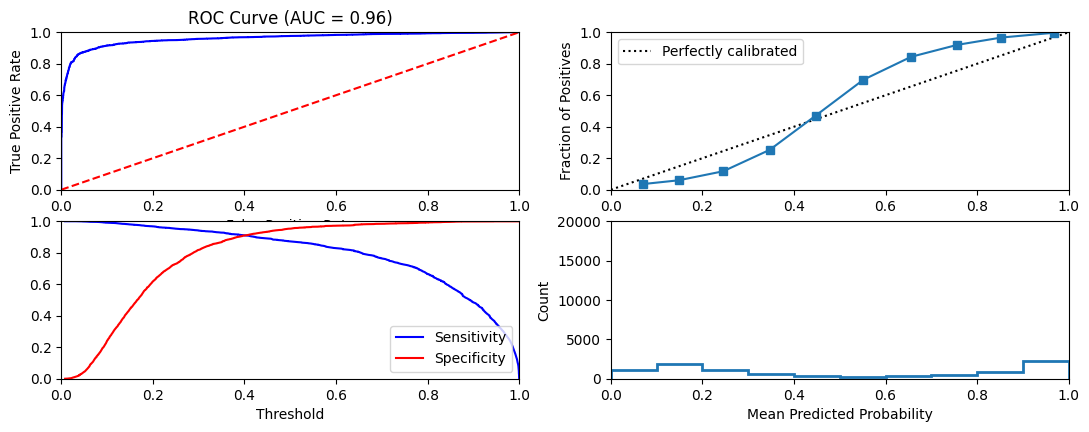

In [83]:
random_forest = RandomForestClassifier()
cv_parameters = {
    'max_depth': [80, 100],
    'min_samples_leaf': [3, 5],
    'n_estimators': [100, 200]
}

p1 = make_pipeline(ct, random_forest)

rf = fit_classification(p1, resampled_data,cv_parameters, model_name = 'Random Forest', print_feature_importance = True)

Here, the precision looks pretty good - 90% for defaulters and that is great.

# Finding feature importances of random forest model

In [84]:
rf.keys()

dict_keys(['model', 'y_pred_labels', 'y_pred_probs'])